In [36]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [ ]:
# deleteme
# from pandas.tools.plotting import table

In [37]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
import timeit
import csv
import os
import string
import textblob
import requests
import io
import nltk

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, StratifiedKFold, cross_val_score

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier

from sklearn.decomposition import PCA
from sklearn.decomposition import RandomizedPCA

from sklearn.metrics import make_scorer, accuracy_score, f1_score, roc_curve, auc
from sklearn.metrics import homogeneity_score, completeness_score, v_measure_score, adjusted_rand_score, silhouette_score
from sklearn.metrics import confusion_matrix, roc_auc_score, recall_score, precision_score, classification_report
from sklearn.metrics.pairwise import cosine_similarity

from sklearn import preprocessing
from sklearn import decomposition, ensemble

from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

from importlib import reload
# reload(text_processing)


# nlp = spacy.load('en') # loading the language model 
#data = pd.read_feather('data/preprocessed_data') # reading a pandas dataframe which is stored as a feather file


%matplotlib inline
# sns.set_context('poster')
# sns.set_color_codes()
full_path_data_store = '/home/silas/final_project/Data/'

#### load data

In [39]:
# load datasets as needed - care for memory overflow

# df_names = ['climate','climate_alt','eu','spam','newsgroups','reuters','bbc','science']

df_names=['climate_science','eu_science']

def load_df_datasets(df_lst):
    """
    Loads data from local data stored as pickle file
    Args
        df_lst: a list of dataframe names - see data_loader.ipynb
    Returns
        df_dataset: a dataframe of datasets
    """
    df_datasets={}
    for df_name in df_lst:
        
        with open('Data/{}.pkl'.format(df_name), 'rb') as handle:
            df_datasets[df_name] = pickle.load(handle)
    
    return df_datasets


df_datasets = load_df_datasets(df_names)

### Runs

nomenclature for labeling runs

> binary ('bin')
   - toy datasets (e.g. 'bin_spam')
   - climate merged ('bin_mgd')
       + 'science' (e.g. 'bin_mgd_science')

> multi-class as binary ('mult_bin') \ use binarization cell below
   - toy datasets (e.g. 'mult_bin_bbc')
   - climate_merged ('mult_bin_mgd')
       + 'science' ('mult_bin_mgd_science')

> multi-class as multi-class ('mult_mult')
   - toy datasets (e.g. 'mult_mult_bbc')
   - climate_merged ('mult_mult_mgd')
       + 'science' ('mult_mult_mgd_science')
    
    

In [40]:
# ready available datasets
list(df_datasets.keys())

['climate_science', 'eu_science']

In [41]:
#select processed or unprocessed text data
processed=input('for processed data, enter 1 ')

for processed data, enter 1 1


In [60]:
os.mkdir('Output/'+run_title)

In [42]:
# enter run title here with '_' connecting words
run_title = input('provide title of run: ')+'_'
run_title = run_title+processed
# make dir for saves - hash if already created
# os.mkdir('Output/'+run_title)
# enter dataset
df_name_=input('provide primary dataset name: ')

provide title of run: split_climate_eu_science
provide primary dataset name: climate_science


### Data splits

In [43]:
# split single dataframe into processed and unprocessed text and labels

def pre_split_data(df):
    texts = df.texts
    labels = df.labels
    processed_texts = df.processed_text
    return  texts,labels,processed_texts

texts,labels,processed_texts=pre_split_data(df_datasets[df_name_])

In [44]:
# split and label encode the target variable for raw and processed datasets

def split_single():
    
    """
    Splits a single dataframe into train and test, text and labels
    
    Args
        texts: either processed_texts or texts (unprocessed)
    Returns
        split and encoded arrays for experiments
    """
    
    

# PROCESSED: preprocessed text, split the dataset into training and validation datasets 
    if processed=="1":
        print('splitting and encoding processed data...')
        train_x, valid_x, train_y_text_label, valid_y_text_label = train_test_split(processed_texts, labels)

# UNPROCESSED: raw text, split the dataset into training and validation datasets
    else: 
        print('splitting and encoding unprocessed data...')
        train_x, valid_x, train_y_text_label, valid_y_text_label = train_test_split(texts, labels)
    

    
    return  train_x, valid_x, train_y_text_label, valid_y_text_label

In [45]:
def split_climate_eu(df_train_name,df_val_name):
    """
    Splits a climate_bbc and eu_bbc dataframe into train (climate_bbc) and test (eu_bbc), text and labels
    
    Args
        texts: either processed_texts or texts (unprocessed)
    Returns
        split and encoded arrays for experiments
    
    """   
    
    labels_climate_bbc=df_datasets[df_train_name]['labels']
    labels_eu_bbc=df_datasets[df_val_name]['labels']
    
    if processed=='1':
        
        
        print('encoding processed data...')
        climate_bbc_processed_texts=df_datasets[df_train_name]['processed_text']
        eu_bbc_processed_texts=df_datasets[df_val_name]['processed_text']
        train_x, valid_x_, train_y_text_label, valid_y_text_label_ = train_test_split(climate_bbc_processed_texts, labels_climate_bbc)
        train_x_, valid_x, train_y_text_label_, valid_y_text_label = train_test_split(eu_bbc_processed_texts, labels_eu_bbc)
    
    else:
        
        print('encoding unprocessed data...')
        climate_bbc_texts=df_datasets[df_train_name]['texts']
        eu_bbc_texts=df_datasets[df_val_name]['texts']
        train_x, valid_x_, train_y_text_label, valid_y_text_label_ = train_test_split(climate_bbc_texts, labels_climate_bbc)
        train_x_, valid_x, train_y_text_label_, valid_y_text_label = train_test_split(eu_bbc_texts, labels_eu_bbc)
    

    return train_x, valid_x, train_y_text_label, valid_y_text_label

In [46]:
single=input('select data: enter "1" for case {climate:train and eu:test} ')

if single=="1":
    df_train_name=input('enter train df name ')
    df_val_name=input('enter val df name ')

select data: enter "1" for case {climate:train and eu:test} 1
enter train df name climate_science
enter val df name eu_science


In [47]:
if single!='1':
    print('splitting single dataset...')
    train_x, valid_x, train_y_text_label, valid_y_text_label=split_single()
else:
    print('splitting climate/eu datasets...')
    train_x, valid_x, train_y_text_label, valid_y_text_label=split_climate_eu(df_train_name,df_val_name)

encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(train_y_text_label)
valid_y = encoder.fit_transform(valid_y_text_label)

splitting climate/eu datasets...
encoding processed data...


In [13]:
# check classes:  encoder.classes_
# get back original class labels: encoder.inverse_transform(train_y)

In [48]:
# dictionary of recording run times for models
time_keeper={}

### Binarize data labels
- binary classification --> takes one category (ex: label '1') and makes '1' all others '0'

In [49]:
# run if binary experiment

binary=input('enter 1 to binarize ')

def binarize(train_y,valid_y,label_id=1):
    
    train_y = np.array((pd.DataFrame({'t_label':train_y}).t_label == label_id).astype('int'))
    valid_y = np.array((pd.DataFrame({'t_label':valid_y}).t_label == label_id).astype('int'))
    
    return train_y,valid_y

if binary=='1':
    print('binarizing data...')
    train_y,valid_y=binarize(train_y,valid_y)
    print('finished')
    # class counts for binarized df
    print("valid: positive class {}\nnegative class {}".format(len(valid_y[valid_y==1]),len(valid_y[valid_y==0])))

enter 1 to binarize 


## Feature Engineering

[reference](#https://www.analyticsvidhya.com/blog/2018/04/a-comprehensive-guide-to-understand-and-implement-text-classification-in-python/)

Options
- [Count & TFIDF vectorization](#vectorizing)
- [NLP feature extraction](#nlp)
- [LDA topic modeling](#topic_modeling)
- [Word embeddings](#embeddings)

<a id='vectorizing'></a>

#### Count & TFIDF Vectorizing: 
[reference](#https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html)
- Analyzer, "word" or "char"
- Strip out stop words (ex: "english").
- Filter out terms that occur in more than half of the docs (ex: max_df=0.5)
- Filter out terms that occur in only one document (min_df=2).
- Select the N most frequently occuring words in the corpus.
- default for tfidf - normalize the vector (L2 norm of 1.0) to normalize the effect of document length on the tf-idf values.

In [50]:
# params take form of (analyzer, token pattern, stop_words)

def run_vectorizer(train_x_,valid_x_, model, params):

    # create a vectorizer object 
    if model == CountVectorizer:
        print('count vectorizing...')
        vect = model(analyzer=params[0], token_pattern=params[1], stop_words=params[2], 
                     lowercase=params[3], ngram_range=params[4])
    
    else:
        print('tfidf vectorizing...')
        vect = model(model(analyzer=params[0], max_df=params[1], min_df=params[2], max_features=params[3], 
          stop_words=params[4], use_idf=params[5]), token_pattern=params[6], ngram_range=params[7])
    
    if processed=='1':
        print('fitting processed texts')
        vect.fit(processed_texts)
        
    else:
        vect.fit(texts)

    # transform the training and validation data using count vectorizer objectea
    xtrain_ =  vect.transform(train_x_)
    xvalid_ =  vect.transform(valid_x_)
    
    return xtrain_, xvalid_

### Count Vectors

In [51]:
start_time = timeit.default_timer()

# count vectorizer params
model_count = CountVectorizer

params_count1 = ('word', r'\w{1,}', 'english', True, (1,1))
params_count2 = ('char', r'\w{1,}', 'english', True, (1,1))
params_count3 = ('word', r'\w{1,}', 'english', True, (2,3))
params_count4 = ('char', r'\w{1,}', 'english', True, (2,3))

print('processing...')
xtrain_count,xvalid_count= run_vectorizer(train_x,valid_x, model_count, params_count1)
xtrain_count_char,xvalid_count_char = run_vectorizer(train_x,valid_x, model_count, params_count2)
xtrain_count_ngram,xvalid_count_ngram = run_vectorizer(train_x,valid_x, model_count, params_count3)
xtrain_count_ngram_chars,xvalid_count_ngram_chars = run_vectorizer(train_x,valid_x, model_count, params_count4)

# code you want to evaluate

elapsed = timeit.default_timer() - start_time
time_keeper['count_vectorization'] = elapsed

processing...
count vectorizing...
fitting processed texts
count vectorizing...
fitting processed texts
count vectorizing...
fitting processed texts
count vectorizing...
fitting processed texts


### TF-IDF Vectors
 

In [52]:
#select processed or unprocessed text data for tfidf vectorization
start_time = timeit.default_timer()

# tfidf vectorizer params

model_tfidf = TfidfVectorizer

params_tfidf1 = ('word',0.9,2,5000,'english',True, r'\w{1,}', (1,1))
params_tfidf2 = ('char',0.9,2,5000,'english',True, r'\w{1,}', (1,1))
params_tfidf3 = ('word',0.9,2,5000,'english',True, r'\w{1,}', (2,3))
params_tfidf4 = ('char',0.9,2,5000,'english',True, r'\w{1,}', (2,3))

print('processing...')
xtrain_tfidf,xvalid_tfidf= run_vectorizer(train_x,valid_x, model_tfidf, params_tfidf1)
xtrain_tfidf_char,xvalid_tfidf_char = run_vectorizer(train_x,valid_x, model_tfidf, params_tfidf2)
xtrain_tfidf_ngram,xvalid_tfidf_ngram = run_vectorizer(train_x,valid_x, model_tfidf, params_tfidf3)
xtrain_tfidf_ngram_chars,xvalid_tfidf_ngram_chars = run_vectorizer(train_x,valid_x, model_tfidf, params_tfidf4)

elapsed = timeit.default_timer() - start_time
time_keeper['tfidf_vectorization'] = elapsed

processing...
tfidf vectorizing...
fitting processed texts
tfidf vectorizing...
fitting processed texts
tfidf vectorizing...
fitting processed texts
tfidf vectorizing...
fitting processed texts


[jump to models](#models)
<a id='nlp'></a>

### Text / NLP based features

In [ ]:
def get_NLP_features(texts, normed_=True):

    trainDF=pd.DataFrame()
    trainDF['char_count'] = texts.apply(len)
    trainDF['word_count'] = texts.apply(lambda x: len(x.split()))
    trainDF['word_density'] = trainDF['char_count'] / (trainDF['word_count']+1)
    trainDF['punctuation_count'] = texts.apply(lambda x: len("".join(_ for _ in x if _ in string.punctuation))) 
    trainDF['title_word_count'] = texts.apply(lambda x: len([wrd for wrd in x.split() if wrd.istitle()]))
    trainDF['upper_case_word_count'] = texts.apply(lambda x: len([wrd for wrd in x.split() if wrd.isupper()]))
    
    pos_family = {
        'noun' : ['NN','NNS','NNP','NNPS'],
        'pron' : ['PRP','PRP$','WP','WP$'],
        'verb' : ['VB','VBD','VBG','VBN','VBP','VBZ'],
        'adj' :  ['JJ','JJR','JJS'],
        'adv' : ['RB','RBR','RBS','WRB']
    }
    
    # function to check and get the part of speech tag count of a words in a given sentence
    def check_pos_tag(x, flag):
        cnt = 0
        try:
            wiki = textblob.TextBlob(x)
            for tup in wiki.tags:
                ppo = list(tup)[1]
                if ppo in pos_family[flag]:
                    cnt += 1
        except:
            pass
        return cnt
    
    trainDF['noun_count'] = texts.apply(lambda x: check_pos_tag(x, 'noun'))
    trainDF['verb_count'] = texts.apply(lambda x: check_pos_tag(x, 'verb'))
    trainDF['adj_count'] = texts.apply(lambda x: check_pos_tag(x, 'adj'))
    trainDF['adv_count'] = texts.apply(lambda x: check_pos_tag(x, 'adv'))
    trainDF['pron_count'] = texts.apply(lambda x: check_pos_tag(x, 'pron'))
    
    if normed_:
        
        x = trainDF.values #returns a numpy array
        min_max_scaler = preprocessing.MinMaxScaler()
        x_scaled = min_max_scaler.fit_transform(x)
        trainDF_normed = pd.DataFrame(x_scaled,columns=trainDF.columns)
        trainDF_normed.to_pickle('Other/{}_nlp_features_normed'.format(run_title))
        
        return trainDF_normed
    
    time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
    trainDF.to_pickle('Output/{}/{}_nlp_features_{}'.format(run_title,run_title, df_name_))
    
    return trainDF 

In [ ]:
NLP_features = get_NLP_features(train_x,normed_=False)

In [ ]:
NLP_features.head()

### Topic Model

-  https://towardsdatascience.com/topic-modeling-and-latent-dirichlet-allocation-in-python-9bf156893c24

<a id='topic_modeling'></a>

In [ ]:
def list_dictionary(dictionary, n=10):
    '''
    Returns: the first n words from dictionary 
    '''
    
    count = 0
    for k, v in dictionary.iteritems():
        print(k, v)
        count += 1
        if count > n:
            break
            
# list_dictionary(dictionary, top=10)

In [ ]:
def inspect_corpus_doc(corpus,doc_to_insp):
    """
    Inspect a doc in the corpus for word frequencies
    Args
        corpus: corpus
        doc_to_insp: int value to show n docs  
    Return
        None
    """
    
    doc_insp = corpus[doc_to_insp]
    for i in range(len(doc_insp)):
        print("Word {} (\"{}\") score {}".format(doc_insp[i][0],dictionary[doc_insp[i][0]],doc_insp[i][1]))

In [ ]:
# print topics from lda_model
def get_topics(model):
    for idx, topic in model.print_topics(-1):
        print('Topic: {} \nWords: {}'.format(idx, topic))
# get_topics(lda_model)

In [ ]:
# inspect where doc in corpus would be classified/assigned topic probability
def lda_in_doc_classification(model, corpus, doc_num):
    for index, score in sorted(model[corpus[doc_num]], key=lambda tup: -1*tup[1]):
        print("\nScore: {}\t \nTopic: {}".format(score, model.print_topic(index, 10)))
# lda_in_doc_classification(lda_model, bow_corpus, 20)
# lda_in_doc_classification(lda_model_tfidf, bow_corpus, 100)

In [ ]:
def lda_out_doc_classification(unseen_document):
    """
    Takes a list of a single doc string
    example: unseen_document = ['The night love tomorrow']
    Args
        unseen_document: single list of tokens
    """
    from text_processing import preprocess_spacy
    text = preprocess_spacy(pd.DataFrame({'texts': unseen_document})).str.split()[0]
    bow_vector = dictionary.doc2bow(text)
    for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print("Score: {}\t Topic: {}".format(score, lda_model.print_topic(index, 5)))

In [ ]:
# build dictionary, bow corpus, and tfidf corpus (using bow corpus)
from gensim.corpora import Dictionary
from gensim.models import TfidfModel,LdaMulticore
dictionary = Dictionary(processed_texts.str.split())
dictionary.filter_extremes(no_below=20, no_above=0.1, keep_n=100000)
bow_corpus = [dictionary.doc2bow(doc) for doc in train_xp.str.split()]
tfidf = TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [ ]:
inspect_corpus_doc(bow_corpus,1)

In [ ]:
inspect_corpus_doc(corpus_tfidf,1)

In [ ]:
# Running LDA using Bag of Words
lda_model = LdaMulticore(bow_corpus, num_topics=10, id2word=dictionary, passes=2, workers=2)

In [ ]:
# Running LDA using TF-IDF
lda_model_tfidf = LdaMulticore(corpus_tfidf, num_topics=10, id2word=dictionary, passes=2, workers=4)

In [ ]:
get_topics(lda_model_tfidf)

In [ ]:
lda_model_tfidf.show_topics(10)
# lda_model_tfidf.get_topics().shape

In [ ]:
unseen_document=['Climate policy jurisdiction based reform']
lda_out_doc_classification(unseen_document)

#### LDA TFIDF similarity

In [ ]:
from nltk import word_tokenize
query_doc = [w.lower() for w in word_tokenize("here is good place to stay.")]
print(query_doc)
query_doc_bow = dictionary.doc2bow(query_doc)
print(query_doc_bow)
query_doc_tf_idf = tfidf[query_doc_bow]
print(query_doc_tf_idf)


In [ ]:
# TFIDF
# https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python
# TFIDF = TfidfModel(corpus)
from gensim.similarities import Similarity
sims = Similarity('temp' , corpus_tfidf, num_features = len(dictionary))
sim_output= sims[query_doc_tf_idf]
sim_output = sorted(enumerate(sim_output), key=lambda item: -item[1])
        
# inspect_corpus(corpus,1704)

In [ ]:
len(sim_output)

In [ ]:
"""
q_doc_TFIDF = tfidf[q_doc]
temp_lst=[]
for idx,i in enumerate(sims[q_doc_TFIDF]):
    if i != 0.:
        temp_lst.append((idx,i))
"""

<a id='models'></a>
<a id='inspect_train_models'></a>
[inspect_vectorizing](#vectorizing)

## -Models
- run all functions below

In [53]:
def train_model(classifier, train_x_, train_y_, valid_x_, valid_y_, is_neural_net=False):
    # fit the training dataset on the classifier
    print('Running model...')
    start_time = timeit.default_timer()
    
    
    if is_neural_net:
        result = classifier.fit(train_x_, train_y_, epochs=3, validation_split=0.2)
        y_predicted = classifier.predict(valid_x_)
        y_predicted = (y_predicted > .12) # y_predicted.argmax(axis=-1)
        
    else:
        result = classifier.fit(train_x_, train_y_)
        # predict the labels on validation dataset
        y_predicted = classifier.predict(valid_x_)
    
    # record results here
    elapsed = timeit.default_timer() - start_time
    plot_confusion_matrix(valid_y_, y_predicted)
    print('Fetching report...')
    report = classification_report(valid_y_, y_predicted) 
    lines = report.split('\n')
    
    report_data = []
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[1]
        row['precision'] = float(row_data[2])
        row['recall'] = float(row_data[3])
        row['f1_score'] = float(row_data[4])
        row['support'] = int(row_data[5])
        row['time_secs'] = elapsed
        report_data.append(row)
    dataframe = pd.DataFrame(report_data)
    
    if is_neural_net: 
        fig, axs = plt.subplots(1,1)
        plot_loss(result)
        plot_accuracy(result)
        
    
    return dataframe,result

In [54]:
def plot_accuracy(result,savefig_=True):
    plt.plot(result.history['acc'])
    plt.plot(result.history['val_acc'])
    plt.title('model accuracy')
    plt.ylabel('accuracy')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='lower right')
    plt.show()
    
    if savefig_:
        time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
        plt.savefig('Output/{}/accuracy_plot_{}_{}.png'.format(run_title,run_title,time_))
        
        
def plot_loss(result,savefig_=True):
    plt.plot(result.history['loss'])
    plt.plot(result.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('loss')
    plt.xlabel('epoch')
    plt.legend(['training', 'validation'], loc='upper right')
    plt.show()
    
    if savefig_:
        time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
        plt.savefig('Output/{}/loss_plot_{}_{}.png'.format(run_title,run_title,time_))

# summarize result for accuracy
#plot_accuracy(result)

# summarize result for loss
#plot_loss(result)

In [55]:
def plot_confusion_matrix(valid_y_, y_predicted, savefig_=True):
    cm = confusion_matrix(valid_y_, y_predicted)
    df_cm = pd.DataFrame(cm)
    fig = plt.figure(figsize=(4,3))
    heatmap = sns.heatmap(df_cm,annot=True,cmap='Blues', fmt='g', cbar=False)
    heatmap.set(xlabel='{}'.format(run_title))
    if savefig_:
        time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
        plt.savefig('Output/{}/confusion_matrix_{}_{}.png'.format(run_title,run_title,time_))

In [56]:
def classification_report_out(report,df_title):
    '''
    Builds a dataframe from a classification report
    '''
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    timex = time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
    dataframe.to_csv('Output/{}/classification_report_{}_{}.csv'.format(run_title,df_title,timex), index = False)
    
    return dataframe

#report = classification_report(y_true, y_pred)

In [57]:
def save_table(df):
    """
    Saves dataframe as .png file 
    """
    ax = plt.subplot(111, frame_on=False) 
    ax.xaxis.set_visible(False)  
    ax.yaxis.set_visible(False)  
    pd.tools.plotting.table(ax, df,header_columns=0, col_width=2.0)  
    plt.savefig('Output/{}/{}_{}.png'.format(run_title,run_title, time_))

[jump_to_NNs](#NNs)

### NB

Running model...


FileNotFoundError: [Errno 2] No such file or directory: 'Output/split_climate_eu_science_1/confusion_matrix_split_climate_eu_science_1_Sun_09_Dec_2018_07:19:38.png'

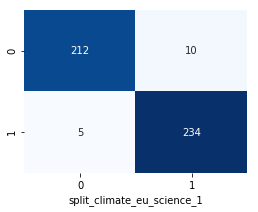

In [58]:
start_time = timeit.default_timer()

# Naive Bayes on Count Vectors
score1,result1 = train_model(MultinomialNB(), xtrain_count, train_y, xvalid_count, valid_y)

score2,result2 = train_model(MultinomialNB(), xtrain_count_char, train_y, xvalid_count_char, valid_y)

# Naive Bayes on Word Level TF IDF Vectors
score3,result3 = train_model(MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)

# Naive Bayes on Ngram Level TF IDF Vectors
score4,result4 = train_model(MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
#print("NB, N-Gram Vectors: ", score,result)

# Naive Bayes on Character Level TF IDF Vectors
score5,result5 = train_model(MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
#print("NB, CharLevel Vectors: ", score,result)

elapsed = timeit.default_timer() - start_time
time_keeper['NB_{}'.format(run_title)]=elapsed

In [59]:
# save joined results
names = ["NB, Count Vectors:","NB, Count Vectors Char: ","NB, WordLevel TF-IDF: ",
"NB, N-Gram Vectors: ","NB, CharLevel Vectors: "]
df_nb = score1.append(score2).append(score3).append(score4).append(score5)
names = list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_nb['class']))) for x in names))
df_nb[' ']=names
df_nb = df_nb.set_index(' ')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_nb.to_csv('Output/{}/nb_classification_report_{}_{}.csv'.format(run_title,run_title,time_), index = False)
df_nb

NameError: name 'score1' is not defined

### KNN


In [ ]:
start_time = timeit.default_timer()

score1, result1 = train_model(KNeighborsClassifier(), xtrain_count, train_y, xvalid_count, valid_y)
# print("KNN, Count Vectors: ", score, result)

score2, result2 = train_model(KNeighborsClassifier(), xtrain_count_char, train_y, xvalid_count_char, valid_y)
# print("KNN, Count Vectors Char: ", score, result)

# Naive Bayes on Word Level TF IDF Vectors
score3, result3 = train_model(KNeighborsClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
# print("KNN, WordLevel TF-IDF: ", score, result)

# Naive Bayes on Ngram Level TF IDF Vectors
score4, result4 = train_model(KNeighborsClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
# print("KNN, N-Gram Vectors: ", score, result)

# Naive Bayes on Character Level TF IDF Vectors
score5, result5 = train_model(KNeighborsClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
#print("KNN, CharLevel Vectors: ", score, result)

elapsed = timeit.default_timer() - start_time
time_keeper['KNN_{}'.format(run_title)]=elapsed

In [ ]:
# names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_nb['class']))) for x in names))

In [ ]:
# save joined results
names = ["KNN, Count Vectors:","KNN, Count Vectors Char: ","KNN, WordLevel TF-IDF: ","KNN, N-Gram Vectors: ","KNN, CharLevel Vectors: "]
df_knn = score1.append(score2).append(score3).append(score4).append(score5)
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_knn['class']))) for x in names))
df_knn['Model_Vec']=names
df_knn = df_knn.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_knn.to_csv('Output/{}/knn_classification_report_{}_knn_{}.csv'.format(run_title,run_title,time_))
df_knn

### SVM

In [ ]:
# SVM N-Gram Chars on TF IDF Vectors

start_time = timeit.default_timer()

score1,result1 = train_model(SVC(), xtrain_count, train_y, xvalid_count, valid_y)
# print("SVM, Count Vectors: ", score,result)

score2,result2 = train_model(SVC(), xtrain_count_char, train_y, xvalid_count_char, valid_y)
# print("SVM, Count Vectors Char: ", score,result)

# SVM on Word Level TF IDF Vectors
score3,result3 = train_model(SVC(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
# print("SVM, WordLevel TF-IDF: ", score,result)

# SVM on Ngram Level TF IDF Vectors
score4,result4 = train_model(SVC(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
# print("SVM, N-Gram Vectors: ", score,result)

# SVM on Character Level TF IDF Vectors
score5,result5 = train_model(SVC(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
#print("SVM, CharLevel Vectors: ", score,result)

elapsed = timeit.default_timer() - start_time
time_keeper['SVM_{}'.format(run_title)]=elapsed

In [ ]:
# save joined results
names = ["SVM, Count Vectors:","SVM, Count Vectors Char: ",
"SVM, WordLevel TF-IDF: ","SVM, N-Gram Vectors: ","SVM, CharLevel Vectors: "]
df_svm = score1.append(score2).append(score3).append(score4).append(score5)
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_knn['class']))) for x in names))
df_svm['Model_Vec']=names
df_svm = df_svm.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_svm.to_csv('Output/{}/svm_classification_report_{}_svm_{}.csv'.format(run_title,run_title, time_))
df_svm

#### SVM experiments

#### SVM grid search cv

In [ ]:
start_time = timeit.default_timer()

#
from sklearn.svm import LinearSVC

pipeline = Pipeline([
        ('vect', TfidfVectorizer(min_df=3, max_df=0.95)),
        ('clf', LinearSVC(C=1000)),
    ])

# TASK: Build a grid search to find out whether unigrams or bigrams are
# more useful.
# Fit the pipeline on the training set using grid search for the parameters
parameters = {
    'vect__ngram_range': [(1, 1), (1, 2)],
}
kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=kfolds,verbose=1)
grid_search.fit(train_x, train_y)

# TASK: print the mean and std for each candidate along with the parameter
# settings for all the candidates exlored by grid search.
n_candidates = len(grid_search.cv_results_['params'])
for i in range(n_candidates):
    print(i, 'params - %s; mean - %0.2f; std - %0.2f'
             % (grid_search.cv_results_['params'][i],
                grid_search.cv_results_['mean_test_score'][i],
                grid_search.cv_results_['std_test_score'][i]))

y_predicted = grid_search.predict(valid_x)

# Print the classification report
report = classification_report(valid_y, y_predicted)

# Print and plot the confusion matrix
plot_confusion_matrix(valid_y, y_predicted)

df_svc = classification_report_out(report,run_title)

# df_svc['Model_Vec']=names
# df_svc = df_svm.set_index('Model_Vec')
# df_svc.to_csv('classification_report_climate_reuters_svc.csv')
elapsed = timeit.default_timer() - start_time
time_keeper['SVC_ex.2.grid_{}'.format(run_title)]=elapsed

df_svc

In [ ]:
# en_stopwords = set(stopwords.words("english")) 
from text_processing import tokenizer
from nltk.corpus import stopwords

vectorizer = CountVectorizer(
    analyzer = 'word',
    tokenizer = tokenizer,
    lowercase = True,
    ngram_range=(1, 1),
    stop_words = stopwords.words('english'))

kfolds = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)

pipeline_svm = make_pipeline(vectorizer, 
                            SVC(probability=True, kernel="linear", class_weight="balanced"))

# https://scikit-learn.org/stable/auto_examples/svm/plot_rbf_parameters.html

grid_svm = GridSearchCV(pipeline_svm,
                    param_grid = {'svc__C': [0.01, 0.1, 1]}, 
                    cv = kfolds,
                    scoring="roc_auc",
                    verbose=1,   
                    n_jobs=-1) 

grid_svm.fit(train_x, train_y)
grid_svm.score(valid_x, valid_y)


predictions_svm_ = grid_svm.predict(valid_x)
cm = confusion_matrix(valid_y, predictions_svm_)
report=classification_report(valid_y,predictions_svm_)
plot_confusion_matrix(valid_y, predictions_svm_)
df_svm = classification_report_out(report,run_title)
df_svm

In [ ]:
grid_svm.best_params_

In [ ]:
# inspect errors
# error_df = pd.DataFrame({'val_text':valid_x, 'val_true':valid_y, 'val_pred':predictions_svm_})
# error_df[(error_df['val_pred']!=error_df['val_true'])].sample(10)

### Logistic Regression

Running model...
Fetching report...
Running model...
Fetching report...
Running model...
Fetching report...
Running model...
Fetching report...


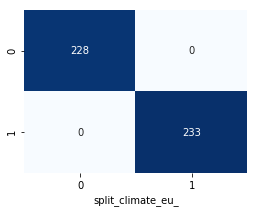

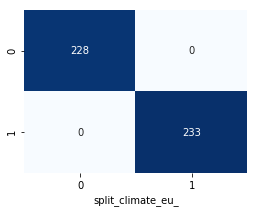

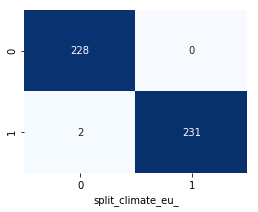

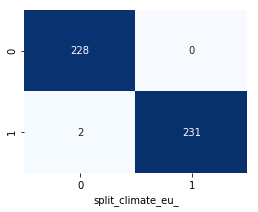

In [33]:
start_time = timeit.default_timer()

# Logistic Regression on Count Vectors
score1, result1 = train_model(LogisticRegression(), xtrain_count, train_y, xvalid_count, valid_y)
#print("LR, Count Vectors: ", accuracy)

# Logistic Regression on Word Level TF IDF Vectors
score2, result2 = train_model(LogisticRegression(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
#print("LR, WordLevel TF-IDF: ", accuracy)

# Logistic Regression on Ngram Level TF IDF Vectors
score3, result3 = train_model(LogisticRegression(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
#print("LR, N-Gram Vectors: ", accuracy)

# Logistic Regression on Character Level TF IDF Vectors
score4, result4 = train_model(LogisticRegression(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
#print("LR, CharLevel Vectors: ", accuracy)

elapsed = timeit.default_timer() - start_time
time_keeper['Logistic_Regression_{}'.format(run_title)]=elapsed

In [34]:
# save joined results
names = ["LRM, Count Vectors:", "LRM, WordLevel TF-IDF: ","LRM, N-Gram Vectors: ","LRM, CharLevel Vectors: "]
df_LRM = score1.append(score2).append(score3).append(score4)
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_LRM['class']))) for x in names))
df_LRM['Model_Vec']=names
df_LRM = df_LRM.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_LRM.to_csv('Output/{}/LRM_classification_report_{}_{}.csv'.format(run_title,run_title,time_))
df_LRM

,class,f1_score,precision,recall,support,time_secs
Model_Vec,,,,,,
"LRM, Count Vectors:",0,1.0,1.00,1.00,228,0.115428
"LRM, Count Vectors:",1,1.0,1.00,1.00,233,0.115428
"LRM, WordLevel TF-IDF:",0,1.0,1.00,1.00,228,0.050480
"LRM, WordLevel TF-IDF:",1,1.0,1.00,1.00,233,0.050480
"LRM, N-Gram Vectors:",0,1.0,0.99,1.00,228,0.559435
"LRM, N-Gram Vectors:",1,1.0,1.00,0.99,233,0.559435
"LRM, CharLevel Vectors:",0,1.0,0.99,1.00,228,0.688911
"LRM, CharLevel Vectors:",1,1.0,1.00,0.99,233,0.688911


### Random Forest

In [ ]:
start_time = timeit.default_timer()

# Random Forest Classifier on Count Vectors
score1, result1 = train_model(ensemble.RandomForestClassifier(), xtrain_count, train_y, xvalid_count, valid_y)
#print("RF, Count Vectors: ", accuracy)

# Random Forest Classifier on Word Level TF IDF Vectors
score2, result2 = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf, train_y, xvalid_tfidf, valid_y)
#print("RF, WordLevel TF-IDF: ", accuracy)

# Random Forest Classifier on Ngram Level TF IDF Vectors
score3, result3 = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y)
#print("RF, N-Gram Vectors: ", accuracy)

# Random Forest Classifier on Character Level TF IDF Vectors
score4, result4 = train_model(ensemble.RandomForestClassifier(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y)
#print("RF, CharLevel Vectors: ", accuracy)

elapsed = timeit.default_timer() - start_time
time_keeper['Random_Forest_{}'.format(run_title)]=elapsed

In [ ]:
# save joined results
names = ["RF, Count Vectors:","RF, WordLevel TF-IDF: ","RF, N-Gram Vectors: ","RF, CharLevel Vectors: "]
df_RF = score1.append(score2).append(score3).append(score4)
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_RF['class']))) for x in names))
df_RF['Model_Vec']=names
df_RF = df_RF.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_RF.to_csv('Output/{}/RF_classification_report_{}.csv'.format(run_title,run_title,time_))
df_RF

### save and checkpoint

In [ ]:
df_tk=pd.DataFrame.from_dict(time_keeper, orient='index', columns=['total_test_time_secs'])

In [ ]:
df_tk.to_csv('Output/{}/{}_merged_run_times_unprocessed.csv'.format(run_title,run_title))

<a id='NNs'></a>
[inspect_train_models](#inspect_train_models)

## NNs

### Keras

In [ ]:
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

In [ ]:
from sklearn import metrics

### NN

In [ ]:
start_time = timeit.default_timer()

def create_model_architecture(input_size):
    # create input layer 
    input_layer = layers.Input((input_size, ), sparse=True)
    
    # create hidden layer
    hidden_layer = layers.Dense(100, activation="relu")(input_layer)
    
    # create output layer
    output_layer = layers.Dense(1, activation="sigmoid")(hidden_layer)

    classifier = models.Model(inputs = input_layer, outputs = output_layer)
    classifier.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return classifier 

#classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
# score, result1 = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,valid_y, is_neural_net=True)

# Neural net on Count Vectors
classifier = create_model_architecture(xtrain_count.shape[1])
score1, result1 = train_model(classifier, xtrain_count, train_y, xvalid_count, valid_y, is_neural_net=True)


# Neural net on Word Level TF IDF Vectors
classifier = create_model_architecture(xtrain_tfidf.shape[1])
score2, result2 = train_model(classifier, xtrain_tfidf, train_y, xvalid_tfidf, valid_y, is_neural_net=True)


# Neural net on Ngram Level TF IDF Vectors
classifier = create_model_architecture(xtrain_tfidf_ngram.shape[1])
score3, result3 = train_model(classifier, xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram, valid_y, is_neural_net=True)


# Neural net on Character Level TF IDF Vectors
classifier = create_model_architecture(xtrain_tfidf_ngram_chars.shape[1])
score4, result4 = train_model(classifier, xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars, valid_y, is_neural_net=True)


elapsed = timeit.default_timer() - start_time
time_keeper['Neural_Net_{}'.format(run_title)]=elapsed

In [ ]:
# save joined results
names = ["NN, Count Vectors:","NN, WordLevel TF-IDF: ","NN, N-Gram Vectors: ","NN, CharLevel Vectors: "]
df_NN = score1.append(score2).append(score3).append(score4)
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(df_NN['class']))) for x in names))
df_NN['Model_Vec']=names
df_NN = df_NN.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_NN.to_csv('Output/{}/NN_classification_report_{}.csv'.format(run_title,run_title,time_))
# save_table(df_NN)
df_NN

### Word Embeddings

<a id='embeddings'></a>

In [21]:
from keras.preprocessing import text, sequence

# load the pre-trained word-embedding vectors 
embeddings_index = {}
for i, line in enumerate(open('../Data/wiki-news-300d-1M.vec')):
    values = line.split()
    embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')

# create a tokenizer in keras
token = text.Tokenizer()
token.fit_on_texts(texts)
word_index = token.word_index

# convert text to sequence of tokens and pad them to ensure equal length vectors 
train_seq_x = sequence.pad_sequences(token.texts_to_sequences(train_x), maxlen=70)
valid_seq_x = sequence.pad_sequences(token.texts_to_sequences(valid_x), maxlen=70)

# create token-embedding mapping
embedding_matrix = np.zeros((len(word_index) + 1, 300))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

###  CNN

Running model...
Train on 2534 samples, validate on 634 samples
Epoch 1/3
2534/2534 [==============================] - 3s 1ms/step - loss: 0.3124 - acc: 0.8974 - val_loss: 0.0647 - val_acc: 0.9826
Epoch 2/3
2534/2534 [==============================] - 2s 757us/step - loss: 0.0478 - acc: 0.9862 - val_loss: 0.0310 - val_acc: 0.9921
Epoch 3/3
2534/2534 [==============================] - 2s 752us/step - loss: 0.0262 - acc: 0.9917 - val_loss: 0.0341 - val_acc: 0.9874
Fetching report...


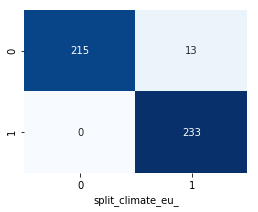

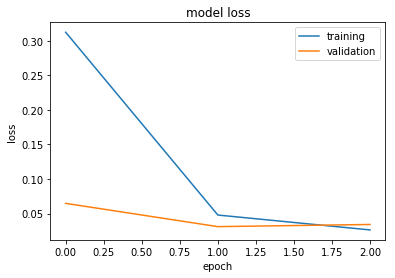

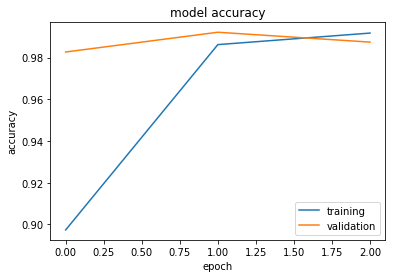

<Figure size 432x288 with 0 Axes>

In [22]:
def create_cnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

classifier = create_cnn()
score1,result1 = train_model(classifier, train_seq_x, train_y, valid_seq_x, valid_y, is_neural_net=True)

In [23]:
names = ["CNN"]
df_CNN = score1
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(valid_y))) for x in names))
    
df_CNN['Model_Vec']=names
df_CNN=df_CNN.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_CNN.to_csv('Output/{}/CNN_classification_report_{}.csv'.format(run_title,run_title,time_))
df_CNN

,class,f1_score,precision,recall,support,time_secs
Model_Vec,,,,,,
CNN,0,0.97,1.00,0.94,228,7.02129
CNN,1,0.97,0.95,1.00,233,7.02129


### LSTM

Running model...
Train on 2534 samples, validate on 634 samples
Epoch 1/3
2534/2534 [==============================] - 8s 3ms/step - loss: 0.3509 - acc: 0.8804 - val_loss: 0.1000 - val_acc: 0.9732
Epoch 2/3
2534/2534 [==============================] - 5s 2ms/step - loss: 0.0730 - acc: 0.9795 - val_loss: 0.0955 - val_acc: 0.9763
Epoch 3/3
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0471 - acc: 0.9854 - val_loss: 0.1474 - val_acc: 0.9669
Fetching report...


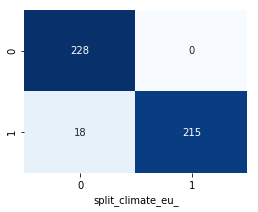

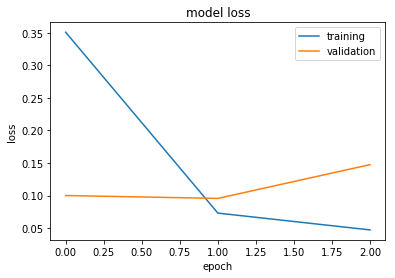

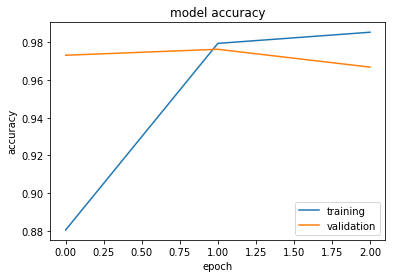

<Figure size 432x288 with 0 Axes>

In [24]:
def create_rnn_lstm():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.LSTM(100)(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

classifier = create_rnn_lstm()
score1, result = train_model(classifier, train_seq_x, train_y, valid_seq_x, valid_y, is_neural_net=True)

In [25]:
names = ["LSTM"]
df_LSTM = score1
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(valid_y))) for x in names))
    
df_LSTM['Model_Vec']=names
df_LSTM=df_LSTM.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_LSTM.to_csv('Output/{}/{}_classification_report_{}.csv'.format(run_title,run_title,time_))
df_LSTM

,class,f1_score,precision,recall,support,time_secs
Model_Vec,,,,,,
LSTM,0,0.96,0.93,1.00,228,20.058793
LSTM,1,0.96,1.00,0.92,233,20.058793


### Bidirectional RNN

Running model...
Train on 2534 samples, validate on 634 samples
Epoch 1/3
2534/2534 [==============================] - 9s 4ms/step - loss: 0.2684 - acc: 0.8911 - val_loss: 0.0727 - val_acc: 0.9811
Epoch 2/3
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0577 - acc: 0.9779 - val_loss: 0.0378 - val_acc: 0.9842
Epoch 3/3
2534/2534 [==============================] - 6s 2ms/step - loss: 0.0374 - acc: 0.9874 - val_loss: 0.0447 - val_acc: 0.9874
Fetching report...


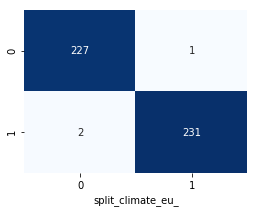

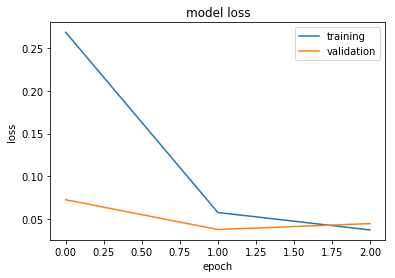

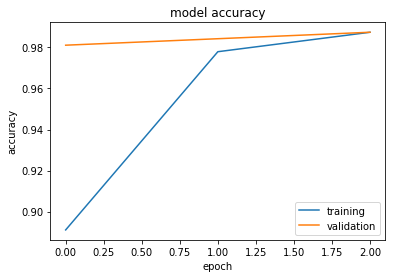

<Figure size 432x288 with 0 Axes>

In [26]:
def create_bidirectional_rnn():
# Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)

    # Add the LSTM Layer
    lstm_layer = layers.Bidirectional(layers.GRU(100))(embedding_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(lstm_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

classifier = create_bidirectional_rnn()
score1, result = train_model(classifier, train_seq_x, train_y, valid_seq_x, valid_y, is_neural_net=True)

In [27]:
names = ["RNN_BD"]
df_RNN_BD = score1
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(valid_y))) for x in names))
df_RNN_BD['Model_Vec']=names
df_RNN_BD=df_RNN_BD.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_RNN_BD.to_csv('Output/{}/{}_classification_report_{}.csv'.format(run_title,run_title,time_))
df_RNN_BD

,class,f1_score,precision,recall,support,time_secs
Model_Vec,,,,,,
RNN_BD,0,0.99,0.99,1.00,228,23.855505
RNN_BD,1,0.99,1.00,0.99,233,23.855505


### RCNN

Running model...
Train on 2534 samples, validate on 634 samples
Epoch 1/3
2534/2534 [==============================] - 3s 1ms/step - loss: 0.3230 - acc: 0.8812 - val_loss: 0.0603 - val_acc: 0.9842
Epoch 2/3
2534/2534 [==============================] - 2s 694us/step - loss: 0.0575 - acc: 0.9834 - val_loss: 0.0337 - val_acc: 0.9905
Epoch 3/3
2534/2534 [==============================] - 2s 703us/step - loss: 0.0291 - acc: 0.9917 - val_loss: 0.0257 - val_acc: 0.9921
Fetching report...


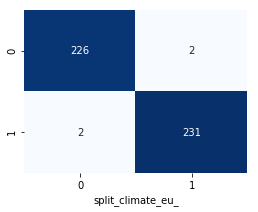

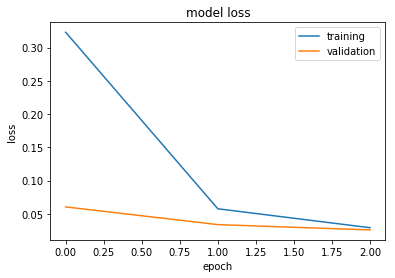

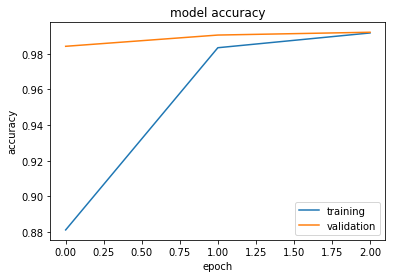

<Figure size 432x288 with 0 Axes>

In [28]:
def create_rcnn():
    # Add an Input Layer
    input_layer = layers.Input((70, ))

    # Add the word embedding Layer
    embedding_layer = layers.Embedding(len(word_index) + 1, 300, weights=[embedding_matrix], trainable=False)(input_layer)
    embedding_layer = layers.SpatialDropout1D(0.3)(embedding_layer)
    
    # Add the recurrent layer
    rnn_layer = layers.Bidirectional(layers.GRU(50, return_sequences=True))(embedding_layer)
    
    # Add the convolutional Layer
    conv_layer = layers.Convolution1D(100, 3, activation="relu")(embedding_layer)

    # Add the pooling Layer
    pooling_layer = layers.GlobalMaxPool1D()(conv_layer)

    # Add the output Layers
    output_layer1 = layers.Dense(50, activation="relu")(pooling_layer)
    output_layer1 = layers.Dropout(0.25)(output_layer1)
    output_layer2 = layers.Dense(1, activation="sigmoid")(output_layer1)

    # Compile the model
    model = models.Model(inputs=input_layer, outputs=output_layer2)
    model.compile(optimizer=optimizers.Adam(), loss='binary_crossentropy',metrics=['accuracy'])
    
    return model

classifier = create_rcnn()
score1,result = train_model(classifier, train_seq_x, train_y, valid_seq_x,valid_y, is_neural_net=True)

In [29]:
names = ["RCNN"]
df_RCNN = score1
names=list(itertools.chain.from_iterable(itertools.repeat(x, len(set(valid_y))) for x in names))
df_RCNN['Model_Vec']=names
df_RCNN=df_RCNN.set_index('Model_Vec')
time_=time.strftime("%a_%d_%b_%Y_%H:%M:%S", time.gmtime())
df_RCNN.to_csv('Output/{}/{}_classification_report_{}.csv'.format(run_title,run_title,time_))
df_RCNN

,class,f1_score,precision,recall,support,time_secs
Model_Vec,,,,,,
RCNN,0,0.99,0.99,0.99,228,7.272625
RCNN,1,0.99,0.99,0.99,233,7.272625
